In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer

from wordcloud import WordCloud

Duplicate key in file WindowsPath('c:/Users/god12/Anaconda3/envs/wassup/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')


In [2]:
#df = pd.read_csv('eng_pop.csv')
#df = pd.read_csv('eng_rock.csv')
#df = pd.read_csv('eng_folk.csv')
#df = pd.read_csv('eng_hiphop.csv')
#df = pd.read_csv('eng_rnb.csv')
df = pd.read_csv('eng_elec.csv')
print(len(df))
df.head()

2479


,Title,Likes,Singer,Lyrics
0,The Drum,"51,577",Alan Walker,Ooh I can't pretend\nLike you didn't bring\nmy...
1,Closer (Feat. Halsey),"244,437",The Chainsmokers,Hey I was doing just fine\nbefore I met you\nI...
2,Faded,"181,014",Alan Walker,You were the shadow to my light\nDid you feel ...
3,The Nights,"78,367",Avicii,Hey\nOnce upon a younger year\nWhen all our sh...
4,On My Way (배틀그라운드 모바일 배경음악),"130,882",Alan Walker,I'm sorry but\nDon't wanna talk\nI need a mome...


In [3]:
lyrics = df.Lyrics.to_list()
print(len(lyrics))
print(lyrics[0])

#file_name = 'eng_pop_text.txt'
#file_name = 'eng_rock_text.txt'
#file_name = 'eng_folk_text.txt'
#file_name = 'eng_hiphop_text.txt'
#file_name = 'eng_rnb_text.txt'
file_name = 'eng_elec_text.txt'
with open(file_name, 'w', encoding = 'utf-8') as file:
    file.write('\n'.join(lyrics))

2479
Ooh I can't pretend
Like you didn't bring
my tempo up again
Tempo up again
My head's in a spin
You send my body to a place
it's never been
Baby won't you let me
Keep you up all night
let the morning come closer
You send me so high now
the ceiling can't hold us
Listen to my heart
let the rhythm control ya
I'll be there
when you need my love
Just follow the beat of my drum
Drum drum drum drum drum
It goes um-pa-pum-pa-pum
pum-pa-pum pum-pa-pum-pum
Um-pa-pum-pa-pum
pum-pa-pum pum-pa-pum-pum
Um-pa-pum-pa-pum
pum-pa-pum pum-pa-pum-pum
Um-pa-pum-pa-pum
pum-pa-pum pum-pa-pum-pum
Just follow the beat of my drum
Ooh I can't pretend
Like I didn't
let your love go to my head
ah-ah mm-mm
Ooh I'm in a spin
You send my body to a place
it's nеver been ah-ah
Whoa-oh oh no
thinkin' about you
makin' my body behave so
Crazy ooh
you makе me wanna sway slow
You push up on me baby
you got me for days oh you do
Baby won't you let me
Keep you up all night
let the morning come closer
You send me so high n

In [4]:
with open('eng_elec_text.txt', 'r', encoding = 'utf-8') as file:
    lyrics = file.read()
print(lyrics[:50])

Ooh I can't pretend
Like you didn't bring
my tempo


In [14]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\god12\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\god12\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Emma
refuse
permit


In [5]:
find_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS']
def normalize(lyric):
    nouns = []
    for word in nltk.tag.pos_tag(nltk.tokenize.word_tokenize(lyric)):
        if word[1] in find_pos:
            nouns.append(word[0])
    lyric_noun = [noun for noun in nouns if len(noun) > 1]
    return lyric_noun

In [6]:
normalized_text = normalize(lyrics)
normalized_text[:5]

['Ooh', 'pretend', 'did', 'bring', 'tempo']

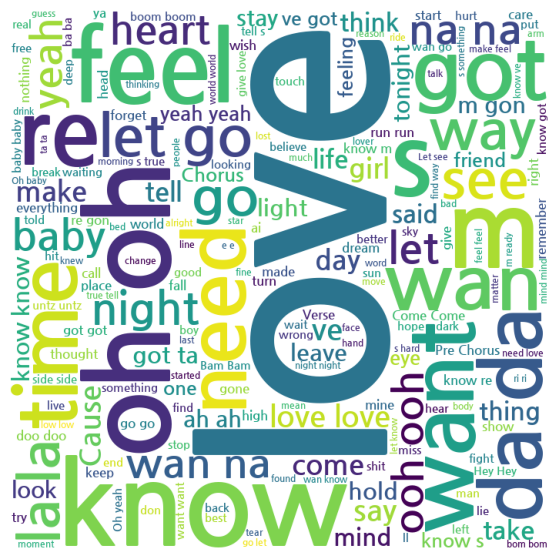

In [7]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
#wc.to_file('wc/eng_pop_wc.png')
#wc.to_file('wc/eng_rock_wc.png')
#wc.to_file('wc/eng_folk_wc.png')
#wc.to_file('wc/eng_hiphop_wc.png')
#wc.to_file('wc/eng_rnb_wc.png')
wc.to_file('wc/eng_elec_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()